We pretty much always want to start notebooks with this line:

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Below is a code box you can do calculations in

(for the group discussion problems during lecture)

In [2]:
.4*.5 + .1*.5

0.25

## Investigating probability distributions

Let's simulate rolling 100 dice and counting the total number of ones from each trial.  __Fix the code below, consulting with your group as to what should replace the ????'s.__  A blank code box is below in case you want to bring up help on `random.rand`, `np.sum` (look for the `axis` keyword...), etc.

(array([1.2900e+02, 2.0210e+03, 1.0888e+04, 3.6361e+04, 2.8399e+04,
        1.5856e+04, 5.7440e+03, 5.4300e+02, 5.5000e+01, 4.0000e+00]),
 array([ 3. ,  6.3,  9.6, 12.9, 16.2, 19.5, 22.8, 26.1, 29.4, 32.7, 36. ]),
 <BarContainer object of 10 artists>)

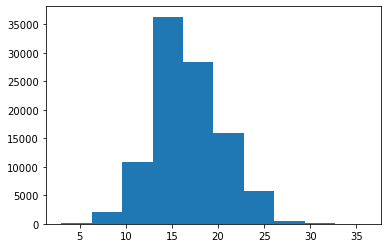

In [3]:
import numpy.random as random
import numpy as np
nsims=int(1E5)
prob=1/6.
is_one=(random.rand(nsims,100) < prob)
ndice=100
# plot a histogram of the total # of 1's from each sim
plt.hist(np.sum(is_one[:,0:ndice],axis=1))

In [6]:
?np.sum

### Implementing this as a function

We want to perform this calculation for different numbers of dice and look at the distribution of results.  This is done in the file `dice.py`, which you should download from Canvas into your python program path (i.e. where you put modules).  New things we're using in this code:

        plt.figure(i) 
This will create a new, separate figure for each plot.  

        plt.title(str(ndice) + ' dice')
`str(ndice)` converts `ndice` to a string.  `plt.title` gives a title to the plot.

__Import the new module (with `import dice`) and run the `rolldice` function from the module in the below code box.__  Try 50_000 simulations to start with.

ndice: 2
np.mean: 0.33262
np.sum: 0.3326
Expected mean: 0.3333 
np.std**2:0.2773
np.var: 0.2773
Expected variance: 0.2778

ndice: 5
np.mean: 0.83062
np.sum: 0.8306
Expected mean: 0.8333 
np.std**2:0.6896
np.var: 0.6896
Expected variance: 0.6944

ndice: 10
np.mean: 1.6595
np.sum: 1.6595
Expected mean: 1.6667 
np.std**2:1.3979
np.var: 1.3979
Expected variance: 1.3889

ndice: 25
np.mean: 4.16584
np.sum: 4.1658
Expected mean: 4.1667 
np.std**2:3.4892
np.var: 3.4892
Expected variance: 3.4722

ndice: 100
np.mean: 16.65986
np.sum: 16.6599
Expected mean: 16.6667 
np.std**2:13.8977
np.var: 13.8977
Expected variance: 13.8889



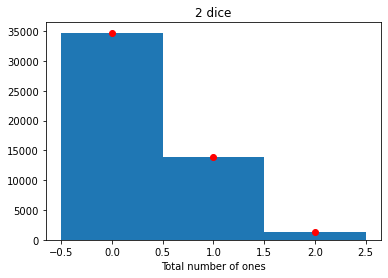

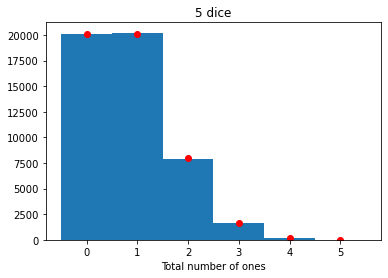

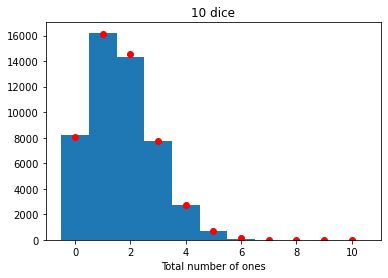

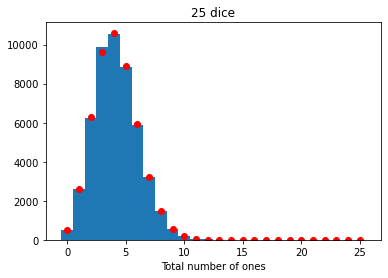

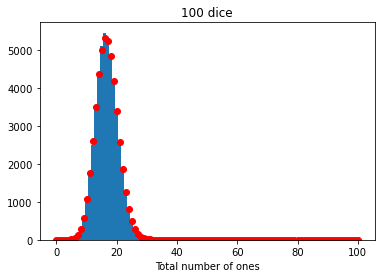

In [6]:
import dice
dice.rolldice(50000)

## Checking the binomial distribution

__Add the following code (or your own equivalent code) to the rolldice procedure.__  You should be able to copy and paste to do this (be sure to save the file afterward).  Note that this code belongs _inside_ the for loop, as we want to test things for each possible number of dice.

Checking if $\mu = N \times p$ with `np.mean()` or `np.sum()`

    print(f'ndice: {ndice}')
    print(f'np.mean: {np.mean(np.sum(is_one[:,0:ndice],axis=1))}')
    print(f'np.sum: {np.sum(np.sum(is_one[:,0:ndice],axis=1))/nsims:.4f}')
    print(f'Expected mean: {ndice*prob:.4f} ')

Checking if the variance $\sigma^2 = N \times p \times (1-p)$ with `np.std` or `np.var`:

    print(f'np.std**2:{np.std( np.sum(is_one[:, 0:ndice],axis=1) )**2:.4f}')
    print(f'np.var: {np.var( np.sum(is_one[:, 0:ndice],axis=1) ) :.4f}')
    print(f'Expected variance: {ndice*prob*(1-prob):.4f}')
    
Also print a blank line to make results clearer:

    print('')

    
In the above,

    print(f'ndice: {ndice}')
is using the f-string formatting in Python. We can specify whether to format as integers or floating point numbers, how many decimal points to add, etc. by putting a colon inside the brackets; e.g. `{ndice:.4f}` would specify that ndice will be printed as a floating point number with 4 digits after the decimal point.  See https://cis.bentley.edu/sandbox/wp-content/uploads/Documentation-on-f-strings.pdf for documentation of the different possible formatting. 

__After making your changes, reload the module and run `rolldice` in the code box below.__

Note that to import the reload function you will need to do:

    from imp import reload
    reload(dice)

ndice: 2
np.mean: 0.3361
np.sum: 0.3361
Expected mean: 0.3333 
np.std**2:0.2783
np.var: 0.2783
Expected variance: 0.2778

ndice: 5
np.mean: 0.84034
np.sum: 0.8403
Expected mean: 0.8333 
np.std**2:0.6942
np.var: 0.6942
Expected variance: 0.6944

ndice: 10
np.mean: 1.67478
np.sum: 1.6748
Expected mean: 1.6667 
np.std**2:1.3873
np.var: 1.3873
Expected variance: 1.3889

ndice: 25
np.mean: 4.1731
np.sum: 4.1731
Expected mean: 4.1667 
np.std**2:3.4877
np.var: 3.4877
Expected variance: 3.4722

ndice: 100
np.mean: 16.6714
np.sum: 16.6714
Expected mean: 16.6667 
np.std**2:13.7681
np.var: 13.7681
Expected variance: 13.8889



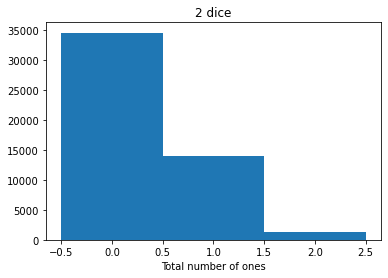

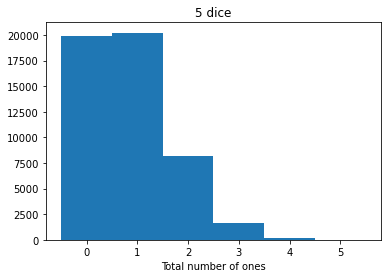

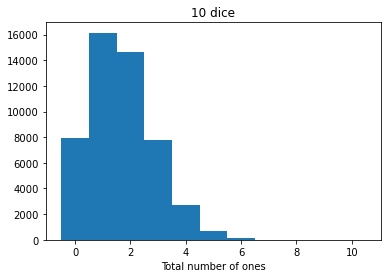

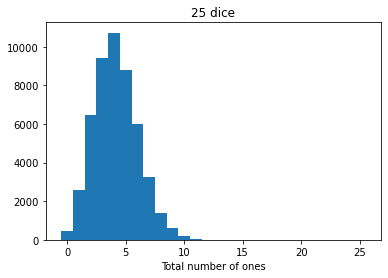

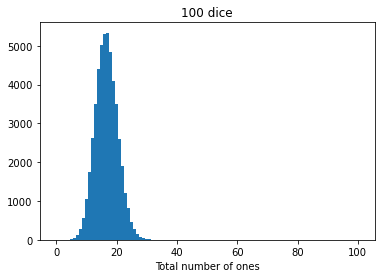

In [13]:
from imp import reload
reload(dice)
dice.rolldice(50000)

## Plotting the binomial distribution

To calculate the binomial distribution, we need to use combinatorics.  Scipy provides functions to calculate either factorials (`scipy.misc.factorial()`) or the number of combinations (N choose M), `scipy.misc.comb()` . 

At the top of the module, let's add imports for them:

	from scipy.special import factorial,comb
Then, after: 

     plt.hist( np.sum(n_ones[:,0:ndice],axis=1), range=(-0.5,ndice+0.5),bins=(ndice + 1) )
Add:

    x=np.arange(ndice)
and either:    

    plt.plot(x,nsims*factorial(ndice)/factorial(x)/   \
    factorial(ndice-x)*prob**x*(1-prob)**(ndice-x),'r-')
where the \ indicates that the python command continues onto the next line, or:

    plt.plot(x,nsims*comb(ndice,x)*prob**x*(1-prob)**(ndice-x),'ro')
    
__Then reload the module and plot again using the code box below.  Does what you get match expectations?__    


ndice: 2
np.mean: 0.33112
np.sum: 0.3311
Expected mean: 0.3333 
np.std**2:0.2768
np.var: 0.2768
Expected variance: 0.2778

ndice: 5
np.mean: 0.83006
np.sum: 0.8301
Expected mean: 0.8333 
np.std**2:0.6940
np.var: 0.6940
Expected variance: 0.6944

ndice: 10
np.mean: 1.66378
np.sum: 1.6638
Expected mean: 1.6667 
np.std**2:1.3831
np.var: 1.3831
Expected variance: 1.3889

ndice: 25
np.mean: 4.16632
np.sum: 4.1663
Expected mean: 4.1667 
np.std**2:3.4794
np.var: 3.4794
Expected variance: 3.4722

ndice: 100
np.mean: 16.64298
np.sum: 16.6430
Expected mean: 16.6667 
np.std**2:13.9346
np.var: 13.9346
Expected variance: 13.8889



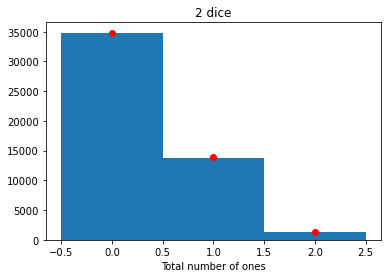

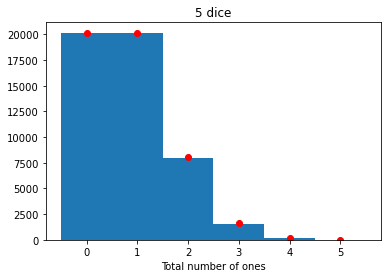

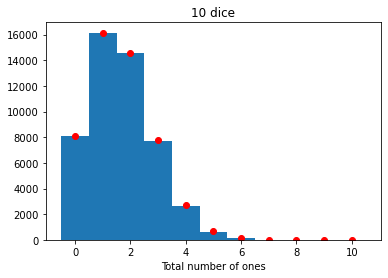

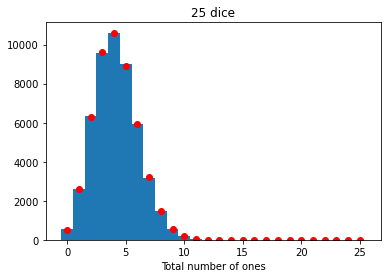

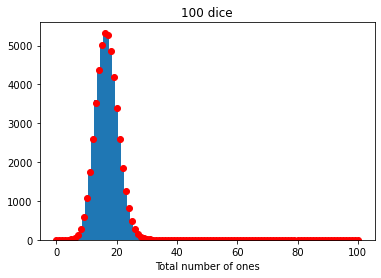

In [18]:
from imp import reload
reload(dice)
dice.rolldice(50000)

## Using the scipy-provided binomial function

`scipy.stats.binom.pmf(x,n,prob)` provides the probability of getting x occurrences out of n trials if the probability of an occurrence is `prob` (note that x can be an array!).  `pmf` here stands for "probability mass function".

Alternatively, you can set up an *object* that is a member of the binomial class and inherits all of its functions ("methods"), utilizing fixed values for `n` and `prob`, with e.g.

				a = stats.binom(n,prob)
and then get the PMF (the discrete equivalent of a PDF) via

 				a.pmf(x)

__In the below code box, import scipy.stats and read the documentation for binom__.

__Then, modify rolldice to add a curve to your plots showing the expected number of ones out of the simulation for each value of x, using `stats.binom` to calculate.__ Note that this will be `nsims` times the probability for one realization of the process (which is what the PMF gives you)...


ndice: 2
np.mean: 0.33048
np.sum: 0.3305
Expected mean: 0.3333 
np.std**2:0.2751
np.var: 0.2751
Expected variance: 0.2778

ndice: 5
np.mean: 0.82978
np.sum: 0.8298
Expected mean: 0.8333 
np.std**2:0.6875
np.var: 0.6875
Expected variance: 0.6944

ndice: 10
np.mean: 1.6639
np.sum: 1.6639
Expected mean: 1.6667 
np.std**2:1.3942
np.var: 1.3942
Expected variance: 1.3889

ndice: 25
np.mean: 4.15498
np.sum: 4.1550
Expected mean: 4.1667 
np.std**2:3.4657
np.var: 3.4657
Expected variance: 3.4722

ndice: 100
np.mean: 16.62302
np.sum: 16.6230
Expected mean: 16.6667 
np.std**2:13.7693
np.var: 13.7693
Expected variance: 13.8889



TypeError: _parse_args() missing 1 required positional argument: 'p'

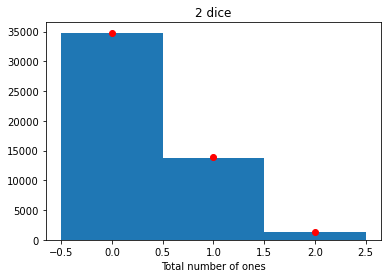

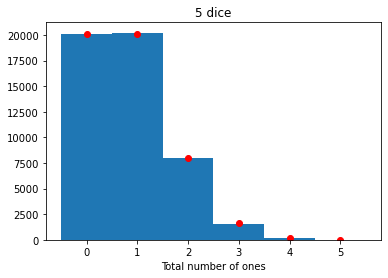

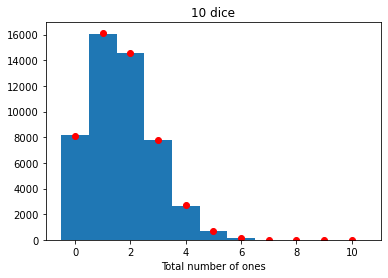

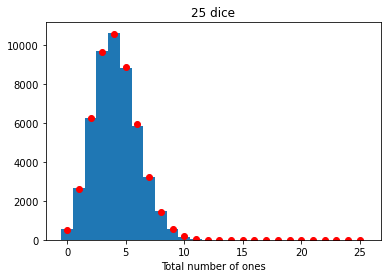

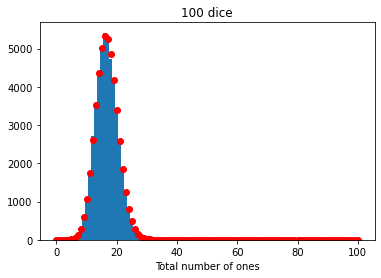

In [9]:
import scipy.stats as stats

stats.binom(dice.rolldice(50000))

# If you have extra time...

Some things you can do if you get ahead of the class:

- Try changing string formats to improve the outputs; try to change the font size in your figures to make them look better; etc.  Share plotting optimizations you tend to use with your neighbors!

- modify `rolldice` so that it can take the number of sides a die has as a keyword input (e.g. 4, 6, 8, 10, 12, 20 and even 100-sided dice exist).  Use 6 sides as a default (see https://www.ibiblio.org/g2swap/byteofpython/read/keyword-arguments.html for how to do this).  As the number of sides increases, the probability of rolling a one goes down.  
 - Does the distribution look more or less Gaussian as the probability changes?
 - Compare the distribution of results for rolling 10 20-sided dice to the distribution for rolling 50 100-sided dice.
        